**Operations Research in Action &#x25aa; Fall 2024**

# Project 1 &ndash; Exploratory Data Analysis

When we start a new project and receive data, the data may be messy and the relationships within the data are unclear. Therefore, the first step of an Operations Research project will often include data wrangling and exploratory data analysis (EDA). Data wrangling is the process of cleaning data and restructuring it for easy analysis. Exploratory data analysis helps us uncover patterns that exist within the data and identify the underlying relationships in the dataset. Ultimately, our goal is produce analysis and visualizations that provide insight to formal statistical analysis or modeling. 

## Loading useful Python packages and raw data into Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import strptime

Use the function `pd.read_excel()` to read in the Demand data on tab Table A3 from the excel file TablesA3A4.xls. 
When you load this data frame, it may be helpful to rename some of the columns, so 'Beer Consumption (lt)' could renamed 'BeerConsumption'. Make sure to double check that the data frame uploaded correctly. 

In [2]:
demand_price_df = pd.read_excel(
    'data/TablesA3A4.xlsx',
    sheet_name = 'Table A3', 
    skiprows = 3, 
    nrows = 84, 
    header = None,
    names = [
        'Year',
        'Month',
        'BeerConsumption',
        'AverageBeerPrice',
        'AverageRakiPrice',
        'AverageCannedSoftDrinkPrice',
        'AverageCannedBeerPrice',
        'AverageDraftBeerPrice'
    ]
)

demand_price_df.head()

,Year,Month,BeerConsumption,AverageBeerPrice,AverageRakiPrice,AverageCannedSoftDrinkPrice,AverageCannedBeerPrice,AverageDraftBeerPrice
0,1987,January,13621800,1338.424656,9715.74,2208.12,2671.750,971.574039
1,1987,February,14346944,1314.441618,9460.31,2150.07,2866.475,946.031197
2,1987,March,14912839,1267.542544,9122.77,2073.36,2764.199,912.276950
3,1987,April,16129850,1241.471640,8935.13,2030.71,2707.345,893.513173
4,1987,May,12140503,1183.481067,8517.76,1935.85,2580.882,851.776142


On your own, create the data frames `tourist_df`, `ramadan_days_df`, and `beer_consumption_df` using the Excel tabs Table A4, RamadanDays, and DailyBeerConsumption, respectively. 

In [3]:
tourist_df =  pd.read_excel(
    'data/TablesA3A4.xlsx',
    sheet_name = 'Table A4', 
    skiprows = 3, 
    nrows = 84, 
    header = None,
    names = [
        'Year',
        'Month',
        'Czechoslovakia',
        'Germany',
        'UnitedKingdom',
        'UnitedStates',
        'France',
        'Others'
    ]
)

tourist_df.head()

,Year,Month,Czechoslovakia,Germany,UnitedKingdom,UnitedStates,France,Others
0,1987,January,290,28056,11380,25060,9246,35135
1,1987,February,253,29715,20630,21648,11941,38488
2,1987,March,478,67370,30506,30386,15810,53071
3,1987,April,1025,271147,70016,43137,94247,141639
4,1987,May,2776,405921,165298,69696,155816,225780


In [4]:
ramadan_days_df = pd.read_excel(
    'data/FromCase.xlsx',
    sheet_name = 'RamadanDays'
)

ramadan_days_df.head()

,Year,Month,RamadanDays
0,1987,January,0
1,1987,February,0
2,1987,March,0
3,1987,April,2
4,1987,May,28


In [5]:
beer_consumption_df = pd.read_excel(
    'data/FromCase.xlsx',
    sheet_name = 'DailyBeerConsumption'
) 

beer_consumption_df.head()

,Country,AvgDailyBeerConsumptionPerCapita
0,Czechoslovakia,0.446575
1,Germany,0.378082
2,UnitedKingdom,0.273973
3,UnitedStates,0.235616
4,Others,0.184395


## Exploratory data analysis

In this project, we want to forecast the beer consumption for the following year. Let's begin by looking at historic beer consumption. Create a graph that plots Beer Consumption by Month and Year. 

In [6]:
colormap = np.array(
    [
        'black', 'brown', 'red', 'orange', 'yellow', 'green', 
        'blue', 'cyan',  'purple', 'fuchsia', 'pink', 'white'
    ]
)

months = np.array(
    [
        strptime(str(x), '%B').tm_mon - 1 
        for x in demand_price_df['Month']
    ]
)

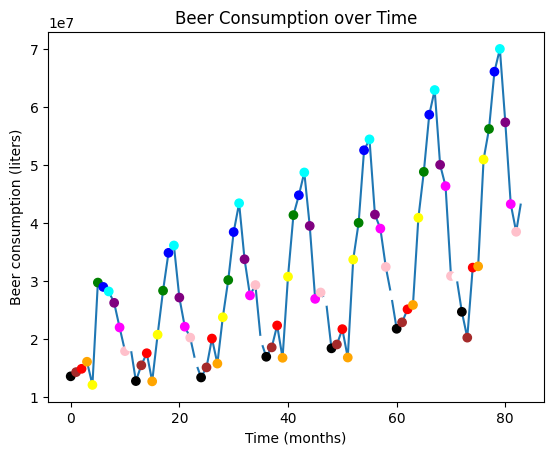

In [7]:
plt.plot(
    demand_price_df.index, 
    demand_price_df['BeerConsumption'], 
    zorder = 1
)

plt.scatter(
    demand_price_df.index, 
    demand_price_df['BeerConsumption'], 
    c = colormap[months], 
    zorder = 2
)

plt.title('Beer Consumption over Time')
plt.xlabel('Time (months)')
plt.ylabel('Beer consumption (liters)')
plt.show();

What do you notice about this graph? 

- Beer consumption appears to grow over time in general.
- Beer consumption also appears to be cyclic.
- Beer consumption in the same month year to year follows an upward trend.
- Beer consumption appears to spike in the summer months.

### Exercise 1 

Explore the relationship between beer consumption and the average beer price. What do you notice?  

Use the following code cell to conduct your analysis. In complete sentences, write about what you have gathered from these graphs. 

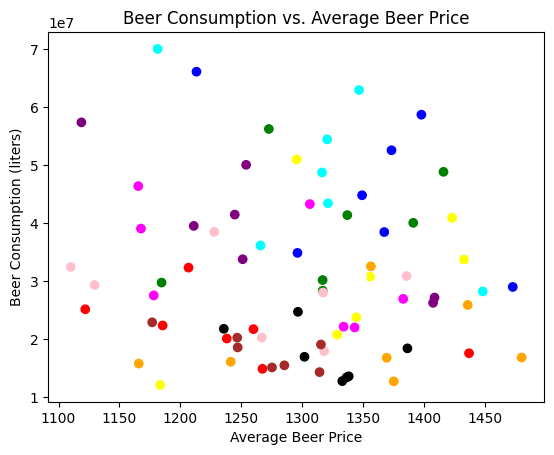

In [8]:
plt.scatter(
    demand_price_df['AverageBeerPrice'], 
    demand_price_df['BeerConsumption'], 
    marker = 'o', 
    c = colormap[months]
)

plt.title('Beer Consumption vs. Average Beer Price') 
plt.xlabel('Average Beer Price') 
plt.ylabel('Beer Consumption (liters)')
plt.show();

- There appears to be a slight negative relationship between beer consumption and average beer price. 
- The month of the year does not appear to have a strong effect.

### Exercise 2 
This data set also includes information about the average prices of several beer substitutes (Raki, canned soft drinks, canned beer, and draft beer). Think about how this price information may be used in our analysis. Make a graph that demonstrates the relationship between the price of beer, the price of Raki, and the amount of beer consumed. 

* There are many ways to consider the relationship between the price of beer, the price of Raki, and the amount of beer consumed.

* One way might be to consider how the _ratio_ between the price of beer and the price of Raki affects beer consumption.

In [9]:
demand_price_df['RakiToBeerRatio'] = demand_price_df['AverageRakiPrice'] / demand_price_df['AverageBeerPrice']

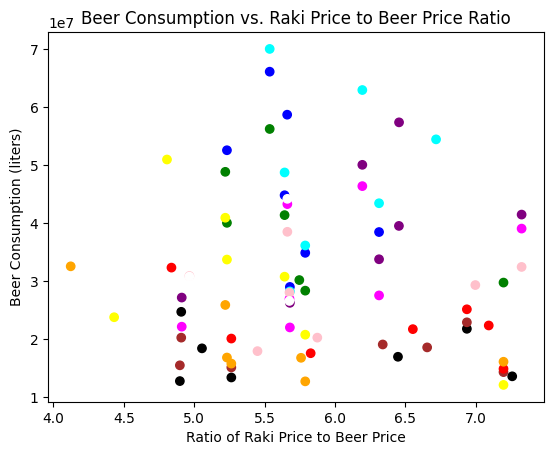

In [10]:
plt.scatter(
    demand_price_df['RakiToBeerRatio'], 
    demand_price_df['BeerConsumption'], 
    marker = 'o', 
    c = colormap[months]
)

plt.title('Beer Consumption vs. Raki Price to Beer Price Ratio') 
plt.xlabel('Ratio of Raki Price to Beer Price') 
plt.ylabel('Beer Consumption (liters)')
plt.show();

## Data wrangling for EDA 

We want to further investigate the effect of Ramadan on beer consumption. Currently, these are two separate data frames. We are going to wrangle these two separate data frames into a single data frame using the `merge` method. For help with the `merge` method in Pandas, you can reference [the documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). 

In [11]:
demand_price_df.head()

,Year,Month,BeerConsumption,AverageBeerPrice,AverageRakiPrice,AverageCannedSoftDrinkPrice,AverageCannedBeerPrice,AverageDraftBeerPrice,RakiToBeerRatio
0,1987,January,13621800,1338.424656,9715.74,2208.12,2671.750,971.574039,7.259086
1,1987,February,14346944,1314.441618,9460.31,2150.07,2866.475,946.031197,7.197208
2,1987,March,14912839,1267.542544,9122.77,2073.36,2764.199,912.276950,7.197210
3,1987,April,16129850,1241.471640,8935.13,2030.71,2707.345,893.513173,7.197208
4,1987,May,12140503,1183.481067,8517.76,1935.85,2580.882,851.776142,7.197209


In [12]:
ramadan_days_df.head()

,Year,Month,RamadanDays
0,1987,January,0
1,1987,February,0
2,1987,March,0
3,1987,April,2
4,1987,May,28


To merge the data frames based on the values of Year and Month, we can do this:

In [13]:
merged_df = demand_price_df.merge(ramadan_days_df, how = 'inner', on = ['Year', 'Month']) 
merged_df.head()

,Year,Month,BeerConsumption,AverageBeerPrice,AverageRakiPrice,AverageCannedSoftDrinkPrice,AverageCannedBeerPrice,AverageDraftBeerPrice,RakiToBeerRatio,RamadanDays
0,1987,January,13621800,1338.424656,9715.74,2208.12,2671.750,971.574039,7.259086,0
1,1987,February,14346944,1314.441618,9460.31,2150.07,2866.475,946.031197,7.197208,0
2,1987,March,14912839,1267.542544,9122.77,2073.36,2764.199,912.276950,7.197210,0
3,1987,April,16129850,1241.471640,8935.13,2030.71,2707.345,893.513173,7.197208,2
4,1987,May,12140503,1183.481067,8517.76,1935.85,2580.882,851.776142,7.197209,28


Create a histogram that demonstrates the difference in beer consumption during months which Ramadan occurs. 

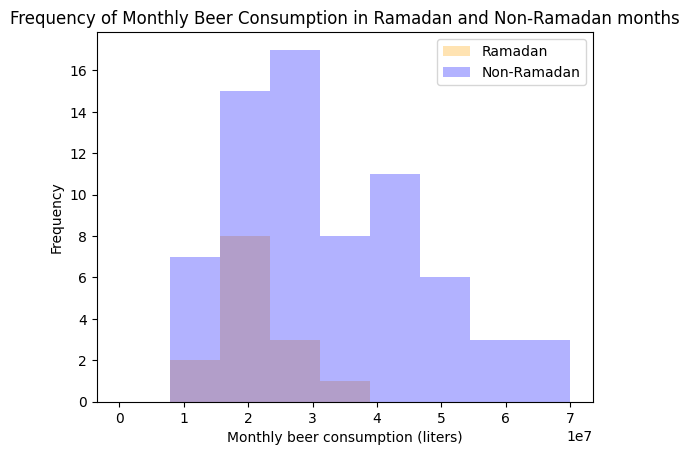

In [14]:
bins = np.linspace(0, 70000000, 10)

plt.hist(merged_df.query('RamadanDays > 0')['BeerConsumption'], bins, color = 'orange', alpha = 0.3, label = 'Ramadan')
plt.hist(merged_df.query('RamadanDays == 0')['BeerConsumption'], bins, color = 'blue', alpha = 0.3, label = 'Non-Ramadan')
plt.legend()
plt.xlabel('Monthly beer consumption (liters)')
plt.ylabel('Frequency')
plt.title('Frequency of Monthly Beer Consumption in Ramadan and Non-Ramadan months')
plt.show();

### Exercise 3 
We want to consider how tourism affects beer consumption. Wrangle the `merged_df`, `tourist_df`, and `beer_consumption_df` to create one data frame called `all_df`. Create a graph to help us understand how much tourist beer consumption affects the total beer consumption at Anadolu Efes.

In [15]:
beer_consumption_df = pd.read_excel(
    'data/FromCase.xlsx',
    sheet_name = 'DailyBeerConsumption',
    index_col = 'Country'
)

beer_consumption_df.head()

,AvgDailyBeerConsumptionPerCapita
Country,
Czechoslovakia,0.446575
Germany,0.378082
UnitedKingdom,0.273973
UnitedStates,0.235616
Others,0.184395


In [16]:
all_df = (
    demand_price_df
    .merge(tourist_df, on=['Year', 'Month'], how='inner')
    .merge(ramadan_days_df, on=['Year', 'Month'], how='inner')
)

all_df.head()

,Year,Month,BeerConsumption,AverageBeerPrice,AverageRakiPrice,AverageCannedSoftDrinkPrice,AverageCannedBeerPrice,AverageDraftBeerPrice,RakiToBeerRatio,Czechoslovakia,Germany,UnitedKingdom,UnitedStates,France,Others,RamadanDays
0,1987,January,13621800,1338.424656,9715.74,2208.12,2671.750,971.574039,7.259086,290,28056,11380,25060,9246,35135,0
1,1987,February,14346944,1314.441618,9460.31,2150.07,2866.475,946.031197,7.197208,253,29715,20630,21648,11941,38488,0
2,1987,March,14912839,1267.542544,9122.77,2073.36,2764.199,912.276950,7.197210,478,67370,30506,30386,15810,53071,0
3,1987,April,16129850,1241.471640,8935.13,2030.71,2707.345,893.513173,7.197208,1025,271147,70016,43137,94247,141639,2
4,1987,May,12140503,1183.481067,8517.76,1935.85,2580.882,851.776142,7.197209,2776,405921,165298,69696,155816,225780,28


In [17]:
all_df['TouristBeerConsumption'] = ( 
    all_df['Czechoslovakia'] * beer_consumption_df['AvgDailyBeerConsumptionPerCapita']['Czechoslovakia']
    + all_df['Germany'] * beer_consumption_df['AvgDailyBeerConsumptionPerCapita']['Germany'] 
    + all_df['UnitedKingdom'] * beer_consumption_df['AvgDailyBeerConsumptionPerCapita']['UnitedKingdom']
    + all_df['UnitedStates'] * beer_consumption_df['AvgDailyBeerConsumptionPerCapita']['UnitedStates'] 
    + all_df['France'] * beer_consumption_df['AvgDailyBeerConsumptionPerCapita']['France']
    + all_df['Others'] * beer_consumption_df['AvgDailyBeerConsumptionPerCapita']['Others']
)

all_df.head()

,Year,Month,BeerConsumption,AverageBeerPrice,AverageRakiPrice,AverageCannedSoftDrinkPrice,AverageCannedBeerPrice,AverageDraftBeerPrice,RakiToBeerRatio,Czechoslovakia,Germany,UnitedKingdom,UnitedStates,France,Others,RamadanDays,TouristBeerConsumption
0,1987,January,13621800,1338.424656,9715.74,2208.12,2671.750,971.574039,7.259086,290,28056,11380,25060,9246,35135,0,27226.000715
1,1987,February,14346944,1314.441618,9460.31,2150.07,2866.475,946.031197,7.197208,253,29715,20630,21648,11941,38488,0,30473.275998
2,1987,March,14912839,1267.542544,9122.77,2073.36,2764.199,912.276950,7.197210,478,67370,30506,30386,15810,53071,0,52677.449434
3,1987,April,16129850,1241.471640,8935.13,2030.71,2707.345,893.513173,7.197208,1025,271147,70016,43137,94247,141639,2,168507.661703
4,1987,May,12140503,1183.481067,8517.76,1935.85,2580.882,851.776142,7.197209,2776,405921,165298,69696,155816,225780,28,274701.483979


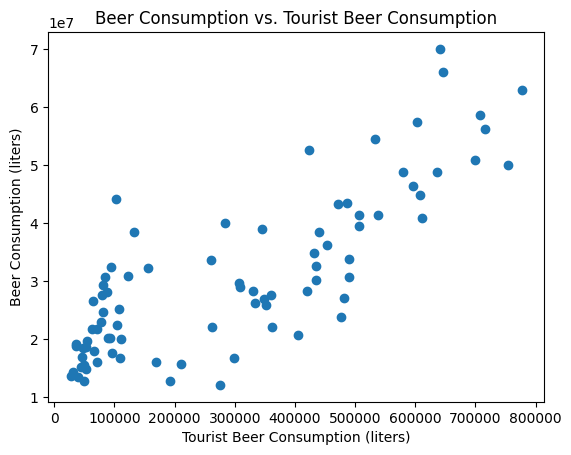

In [18]:
plt.scatter(all_df['TouristBeerConsumption'], all_df['BeerConsumption'])
plt.title('Beer Consumption vs. Tourist Beer Consumption') 
plt.xlabel('Tourist Beer Consumption (liters)') 
plt.ylabel('Beer Consumption (liters)')
plt.show()